In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../data/raw/fraud_dataset_raw.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
#Checking the types of transactions

data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

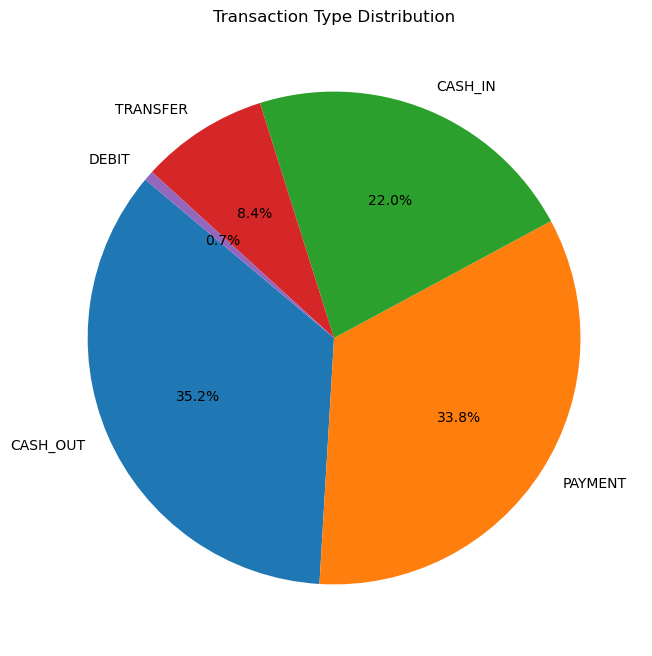

In [5]:
import matplotlib.pyplot as plt

type = data['type'].value_counts()
transaction = type.index
quantity = type.values

plt.figure(figsize=(8, 8))
plt.pie(quantity, labels=transaction, autopct='%1.1f%%', startangle=140)

plt.title('Transaction Type Distribution')
plt.show()


In [6]:
#Checking correlation

correlation = data.drop(columns = ['type', 'nameOrig', 'nameDest']).corr()
print(correlation['isFraud'].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [7]:
#Dropping cloumns that are not required like the account numbers and negetively correlated columns.

new_data = data.drop(columns = ['nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceOrig'])

In [8]:
new_data.head()

,step,type,amount,oldbalanceOrg,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


In [9]:
#Converting categorical columns to numerical using map

new_data['type'] = data['type'].map({'CASH_OUT': 1, 'CASH_IN': 2, 'PAYMENT': 3, 'TRANSFER': 4, 'DEBIT': 5})

new_data.head(10)

,step,type,amount,oldbalanceOrg,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,0.00,0,0
1,1,3,1864.28,21249.00,0.00,0,0
2,1,4,181.00,181.00,0.00,1,0
3,1,1,181.00,181.00,0.00,1,0
4,1,3,11668.14,41554.00,0.00,0,0
5,1,3,7817.71,53860.00,0.00,0,0
6,1,3,7107.77,183195.00,0.00,0,0
7,1,3,7861.64,176087.23,0.00,0,0
8,1,3,4024.36,2671.00,0.00,0,0
9,1,5,5337.77,41720.00,40348.79,0,0


In [10]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split

X = np.array(new_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceDest']])
y = np.array(new_data['isFraud'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)

In [11]:
#Model training

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
#Model Score

rf.score(X_test, y_test)

0.9996115986810465

In [13]:
from sklearn.metrics import f1_score, classification_report

y_pred = rf.predict(X_test)

# Calculating the F1 score
f1 = f1_score(y_test, y_pred)

# Generating the classification report
report = classification_report(y_test, y_pred)

print("F1 Score:", f1)
print("\nClassification Report:\n", report)

F1 Score: 0.8294071964794202

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083486
           1       0.97      0.73      0.83      6610

    accuracy                           1.00   5090096
   macro avg       0.98      0.86      0.91   5090096
weighted avg       1.00      1.00      1.00   5090096



In [15]:
#Prediction

#features = [type, 'amount, 'oldbalanceOrg', 'newbalanceDest']

features = np.array([[1, 12000, 14000, 200]])

prediction = rf.predict(features)

if(prediction == 0):
    print("Not Fraud")
else:
    print("Fraud")

Not Fraud
